#### Part 24: Categorical Data (Continued) and Visualization in Pandas

In this notebook, we'll explore:
- More operations with categorical data
- Introduction to data visualization with pandas
- Various plot types and customization options

##### Setup
First, let's import the necessary libraries:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Set the plotting style
plt.style.use('ggplot')

# Make plots appear in the notebook
%matplotlib inline

##### 1. Categorical Data (Continued)

### 1.1 String and Datetime Accessors with Categorical Data

The accessors `.str` and `.dt` work with categorical data if the categories are of the appropriate type:

In [2]:
# Create a string Series and convert to category
str_s = pd.Series(list('aabb'))
str_cat = str_s.astype('category')
print("Categorical string Series:")
print(str_cat)

# Use string accessor
print("\nUsing .str.contains():")
print(str_cat.str.contains("a"))

Categorical string Series:
0    a
1    a
2    b
3    b
dtype: category
Categories (2, object): ['a', 'b']

Using .str.contains():
0     True
1     True
2    False
3    False
dtype: bool


In [3]:
# Create a datetime Series and convert to category
date_s = pd.Series(pd.date_range('1/1/2015', periods=5))
date_cat = date_s.astype('category')
print("Categorical datetime Series:")
print(date_cat)

# Use datetime accessor
print("\nUsing .dt.day:")
print(date_cat.dt.day)

Categorical datetime Series:
0   2015-01-01
1   2015-01-02
2   2015-01-03
3   2015-01-04
4   2015-01-05
dtype: category
Categories (5, datetime64[ns]): [2015-01-01, 2015-01-02, 2015-01-03, 2015-01-04, 2015-01-05]

Using .dt.day:
0    1
1    2
2    3
3    4
4    5
dtype: int32


Note that the returned Series from methods on the accessors of a categorical Series will be of the same type as if you used the method on a regular Series of that type (not of type category):

In [4]:
# Compare the results of .str.contains() on both Series types
ret_s = str_s.str.contains("a")
ret_cat = str_cat.str.contains("a")

print(f"Same dtype: {ret_s.dtype == ret_cat.dtype}")
print("\nSame values:")
print(ret_s == ret_cat)

Same dtype: True

Same values:
0    True
1    True
2    True
3    True
dtype: bool


### 1.2 Setting Values in Categorical Data

Setting values in a categorical column (or Series) works as long as the value is included in the categories:

In [5]:
# Create a DataFrame with a categorical column
idx = pd.Index(["h", "i", "j", "k", "l", "m", "n"])
cats = pd.Categorical(["a", "a", "a", "a", "a", "a", "a"], categories=["a", "b"])
values = [1, 1, 1, 1, 1, 1, 1]
df = pd.DataFrame({"cats": cats, "values": values}, index=idx)
print("Original DataFrame:")
print(df)

# Set values using .iloc
df.iloc[2:4, :] = [["b", 2], ["b", 2]]
print("\nAfter setting values:")
print(df)

Original DataFrame:
  cats  values
h    a       1
i    a       1
j    a       1
k    a       1
l    a       1
m    a       1
n    a       1

After setting values:
  cats  values
h    a       1
i    a       1
j    b       2
k    b       2
l    a       1
m    a       1
n    a       1


If you try to set a value that is not in the categories, you'll get an error:

In [7]:
# Try to set a value that is not in the categories
try:
    df.iloc[2:4, 0] = "c"  # Assuming the first column is categorical
    print("This should not print if an error occurs")
except TypeError as e:
    print(f"Error: {e}")

# Proper way: Add the new category first, then set the value
print("\nProper way to add a new category:")
# 1. Get the categorical column
cat_col = df.iloc[:, 0]  # Assuming first column is categorical

# 2. Add the new category
df.iloc[:, 0] = cat_col.cat.add_categories(["c"])

# 3. Now you can set the value
df.iloc[2:4, 0] = "c"
print(df)

Error: Cannot setitem on a Categorical with a new category (c), set the categories first

Proper way to add a new category:
  cats  values
h    a       1
i    a       1
j    c       2
k    c       2
l    a       1
m    a       1
n    a       1


/var/folders/7y/fzwln1_93mn3js3wyk61_6xm0000gn/T/ipykernel_74139/3278535667.py:14: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'h    a
i    a
j    b
k    b
l    a
m    a
n    a
Name: cats, dtype: category
Categories (3, object): ['a', 'b', 'c']' has dtype incompatible with category, please explicitly cast to a compatible dtype first.
  df.iloc[:, 0] = cat_col.cat.add_categories(["c"])


Setting values by assigning categorical data will also check that the categories match:

In [12]:
# Create a fresh DataFrame with categorical data
import pandas as pd
import numpy as np

# Create the DataFrame
df = pd.DataFrame({
    'cats': pd.Categorical(['a', 'b', 'a', 'b', 'a', 'b', 'a', 'b']),
    'values': np.random.randn(8)
}, index=list('abcdefgh'))

print("Original DataFrame:")
print(df)
print("\nCategories:", df['cats'].cat.categories.tolist())

# Try setting values with the same categories
try:
    # Use .loc with explicit values instead of Categorical
    df.loc["j":"k", "cats"] = "a"  # This should work
    print("\nAfter setting with valid category:")
    print(df)
except Exception as e:
    print(f"\nError: {e}")

# Add a new category
df['cats'] = df['cats'].cat.add_categories(['c'])
print("\nAfter adding new category:")
print(df)
print("Updated categories:", df['cats'].cat.categories.tolist())

# Now set values using the new category
df.loc["a":"b", "cats"] = "c"
print("\nAfter setting with new category:")
print(df)

Original DataFrame:
  cats    values
a    a  2.001934
b    b  0.862123
c    a -0.305425
d    b -1.797071
e    a  0.636660
f    b  0.313201
g    a -0.297463
h    b -0.383135

Categories: ['a', 'b']

After setting with valid category:
  cats    values
a    a  2.001934
b    b  0.862123
c    a -0.305425
d    b -1.797071
e    a  0.636660
f    b  0.313201
g    a -0.297463
h    b -0.383135

After adding new category:
  cats    values
a    a  2.001934
b    b  0.862123
c    a -0.305425
d    b -1.797071
e    a  0.636660
f    b  0.313201
g    a -0.297463
h    b -0.383135
Updated categories: ['a', 'b', 'c']

After setting with new category:
  cats    values
a    c  2.001934
b    c  0.862123
c    a -0.305425
d    b -1.797071
e    a  0.636660
f    b  0.313201
g    a -0.297463
h    b -0.383135


##### 2. Data Visualization with Pandas

Pandas provides a high-level interface for creating various types of plots using matplotlib. Let's explore some of the visualization capabilities.

### 2.1 Basic Plotting

Let's create a simple DataFrame and plot it:

<Axes: title={'center': 'Basic Time Series Plot'}>

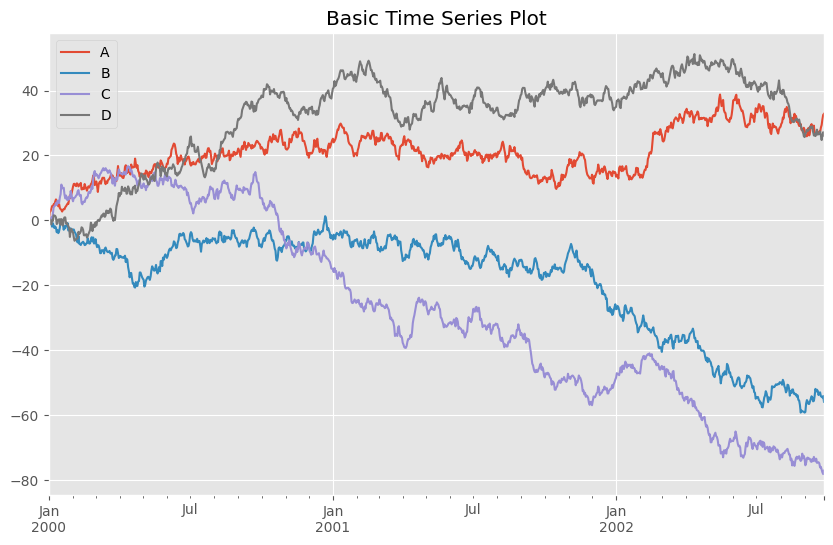

In [13]:
# Create a DataFrame with time series data
ts = pd.Series(np.random.randn(1000), index=pd.date_range('1/1/2000', periods=1000))
df = pd.DataFrame(np.random.randn(1000, 4), index=ts.index, columns=['A', 'B', 'C', 'D'])
df = df.cumsum()

# Plot the DataFrame
df.plot(figsize=(10, 6), title='Basic Time Series Plot')

You can also plot specific columns:

<Axes: title={'center': 'Columns A and B'}>

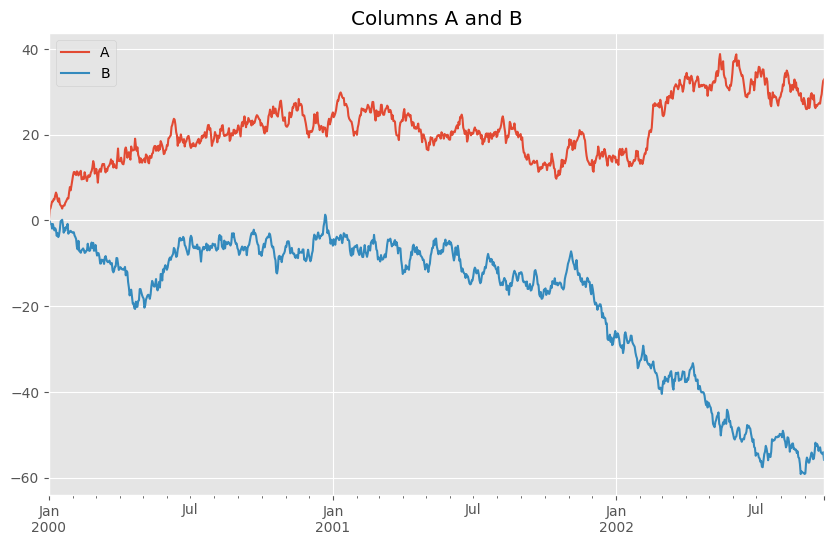

In [14]:
# Plot specific columns
df[['A', 'B']].plot(figsize=(10, 6), title='Columns A and B')

### 2.2 Other Plot Types

Pandas supports various plot types, which can be specified using the `kind` parameter or by using the `.plot.<kind>()` method. Some of the available plot types include:

- 'line' (default): Line plot
- 'bar' or 'barh': Bar plot (vertical or horizontal)
- 'hist': Histogram
- 'box': Box plot
- 'kde' or 'density': Kernel density estimate plot
- 'area': Area plot
- 'scatter': Scatter plot
- 'hexbin': Hexagonal bin plot
- 'pie': Pie plot

Let's explore some of these plot types:

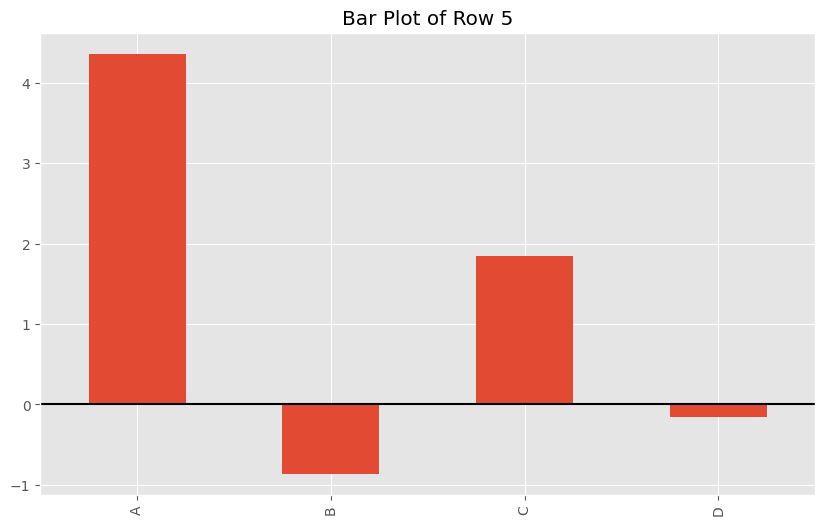

In [15]:
# Bar plot of a single row
plt.figure(figsize=(10, 6))
df.iloc[5].plot(kind='bar', title='Bar Plot of Row 5')
plt.axhline(0, color='k')  # Add a horizontal line at y=0

<Axes: title={'center': 'Multiple Bar Plot'}>

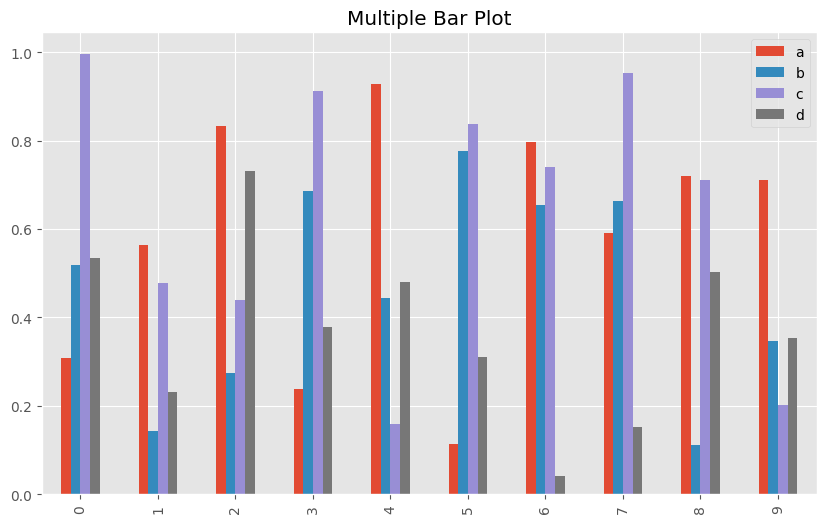

In [16]:
# Create a DataFrame for bar plot
df2 = pd.DataFrame(np.random.rand(10, 4), columns=['a', 'b', 'c', 'd'])

# Bar plot of the entire DataFrame
df2.plot.bar(figsize=(10, 6), title='Multiple Bar Plot')

<Axes: title={'center': 'Stacked Bar Plot'}>

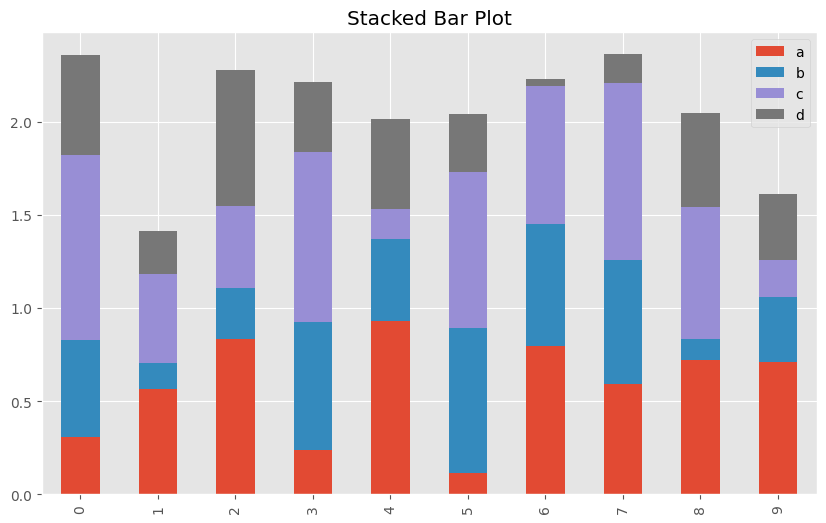

In [17]:
# Stacked bar plot
df2.plot.bar(stacked=True, figsize=(10, 6), title='Stacked Bar Plot')

<Axes: title={'center': 'Horizontal Bar Plot'}>

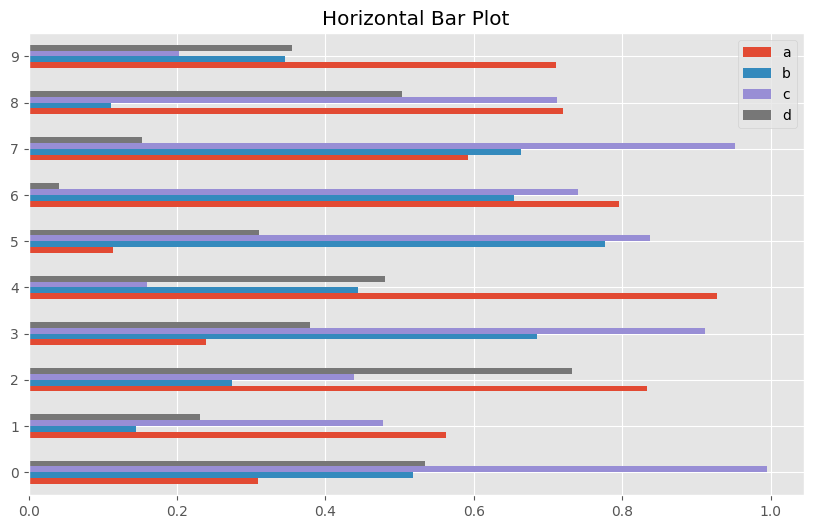

In [18]:
# Horizontal bar plot
df2.plot.barh(figsize=(10, 6), title='Horizontal Bar Plot')

### 2.3 Histograms and Density Plots

<Axes: title={'center': 'Histogram of Column A'}, ylabel='Frequency'>

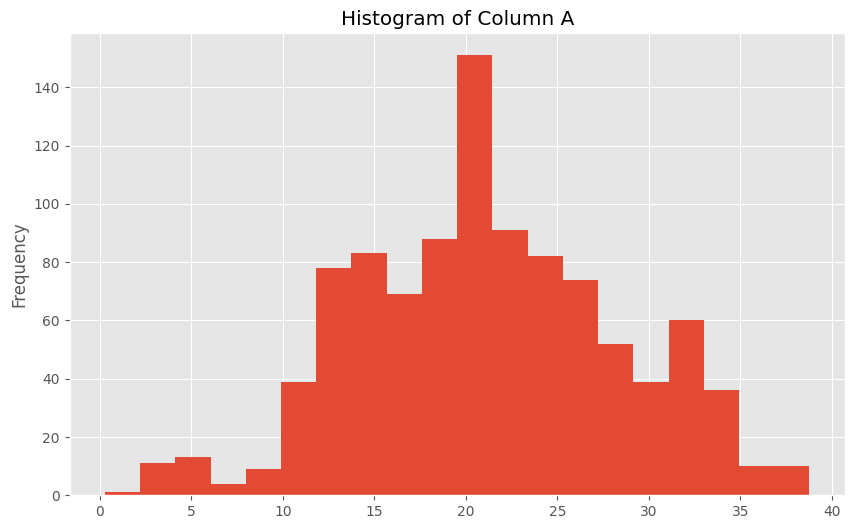

In [19]:
# Histogram
df['A'].plot.hist(bins=20, figsize=(10, 6), title='Histogram of Column A')

ModuleNotFoundError: No module named 'scipy'

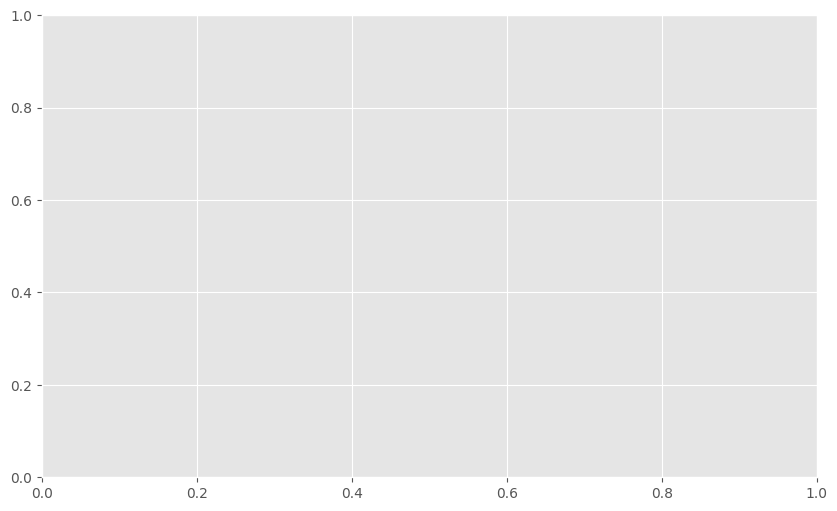

In [20]:
# Kernel Density Estimate (KDE) plot
df['A'].plot.kde(figsize=(10, 6), title='Density Plot of Column A')

### 2.4 Box Plots

<Axes: title={'center': 'Box Plot'}>

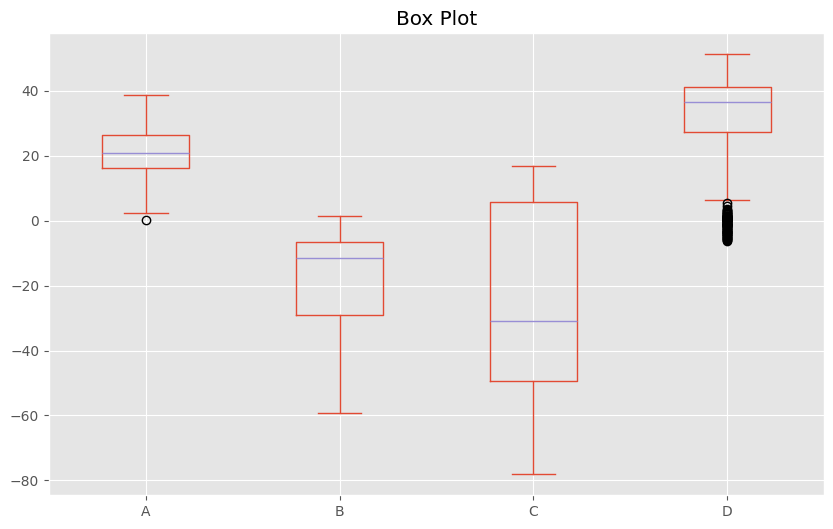

In [21]:
# Box plot
df.plot.box(figsize=(10, 6), title='Box Plot')

### 2.5 Area Plots

ValueError: When stacked is True, each column must be either all positive or all negative. Column 'B' contains both positive and negative values

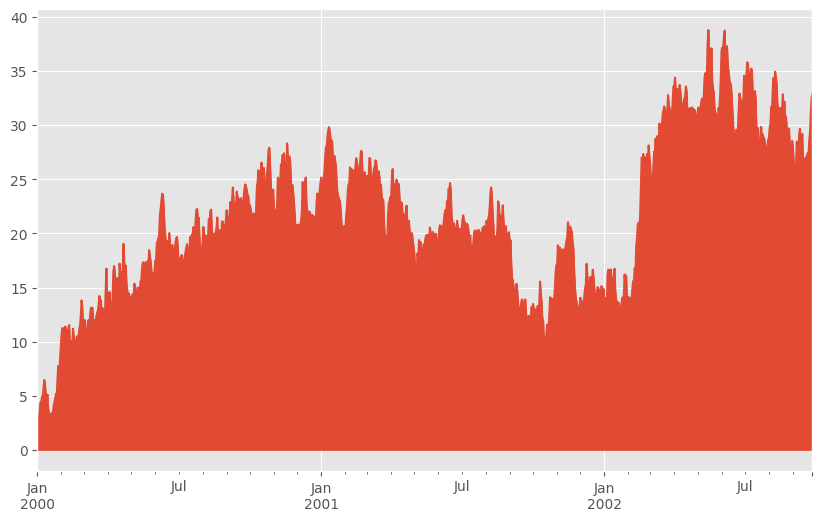

In [22]:
# Area plot
df.plot.area(figsize=(10, 6), title='Area Plot')

### 2.6 Scatter Plots

<Axes: title={'center': 'Scatter Plot of A vs B'}, xlabel='A', ylabel='B'>

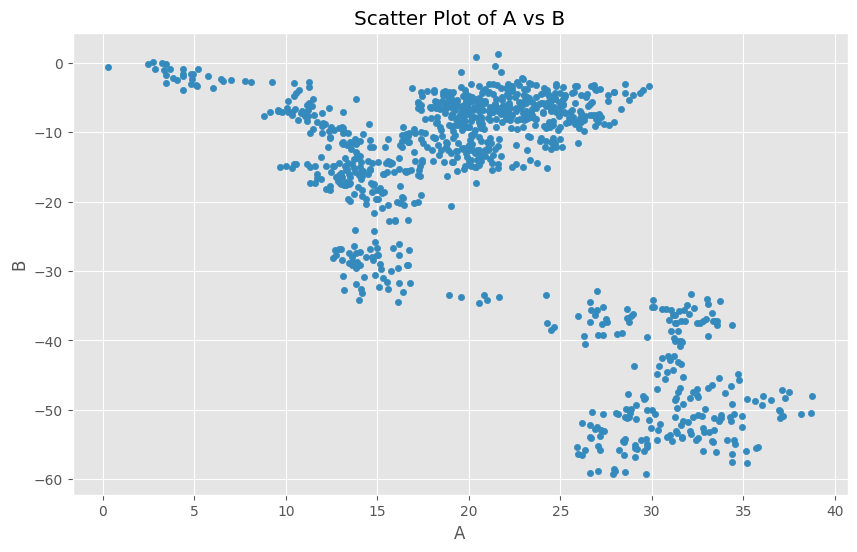

In [23]:
# Scatter plot
df.plot.scatter(x='A', y='B', figsize=(10, 6), title='Scatter Plot of A vs B')

/Users/neo/Downloads/Personal/Projects/pandas-tutorial/venv/lib/python3.13/site-packages/matplotlib/collections.py:1008: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


<Axes: title={'center': 'Scatter Plot with Color and Size'}, xlabel='A', ylabel='B'>

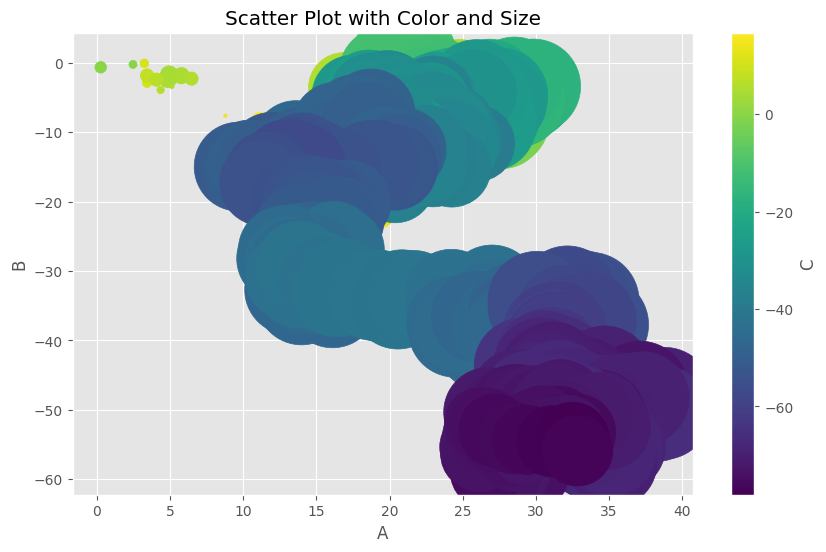

In [24]:
# Scatter plot with color and size
df.plot.scatter(x='A', y='B', c='C', s=df['D'] * 100, figsize=(10, 6), 
                title='Scatter Plot with Color and Size')

### 2.7 Pie Charts

<Axes: title={'center': 'Pie Chart'}, ylabel='series'>

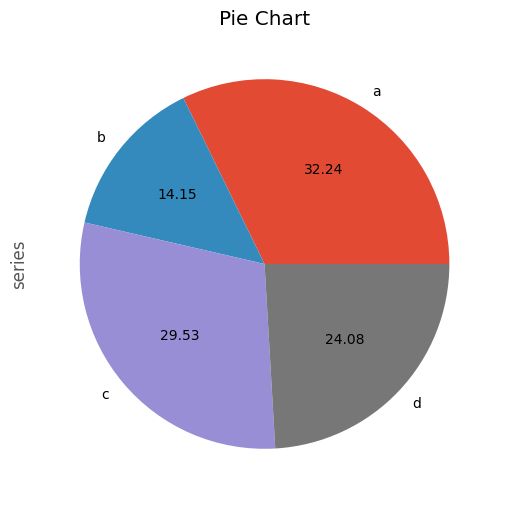

In [25]:
# Create data for pie chart
pie_data = pd.Series(3 * np.random.rand(4), index=['a', 'b', 'c', 'd'], name='series')

# Pie chart
pie_data.plot.pie(figsize=(10, 6), autopct='%.2f', title='Pie Chart')

##### Summary

In this notebook, we've explored:

1. More operations with categorical data in pandas, including:
   - Using string and datetime accessors with categorical data
   - Setting values in categorical data

2. Data visualization with pandas, including:
   - Basic line plots
   - Bar plots (vertical, horizontal, and stacked)
   - Histograms and density plots
   - Box plots
   - Area plots
   - Scatter plots
   - Pie charts

These visualization capabilities make pandas a powerful tool for exploratory data analysis, allowing you to quickly visualize your data in various ways.